Step 1: loading dataset

In [1]:
from sklearn.datasets import fetch_openml

# Load the Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

# Extract features and labels
X, y = fashion_mnist.data, fashion_mnist.target

# Check the shape of the data
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


/Users/amirmohammad/.pyenv/versions/3.8.20/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Features shape: (70000, 784)
Labels shape: (70000,)


Step 1:Showing random images

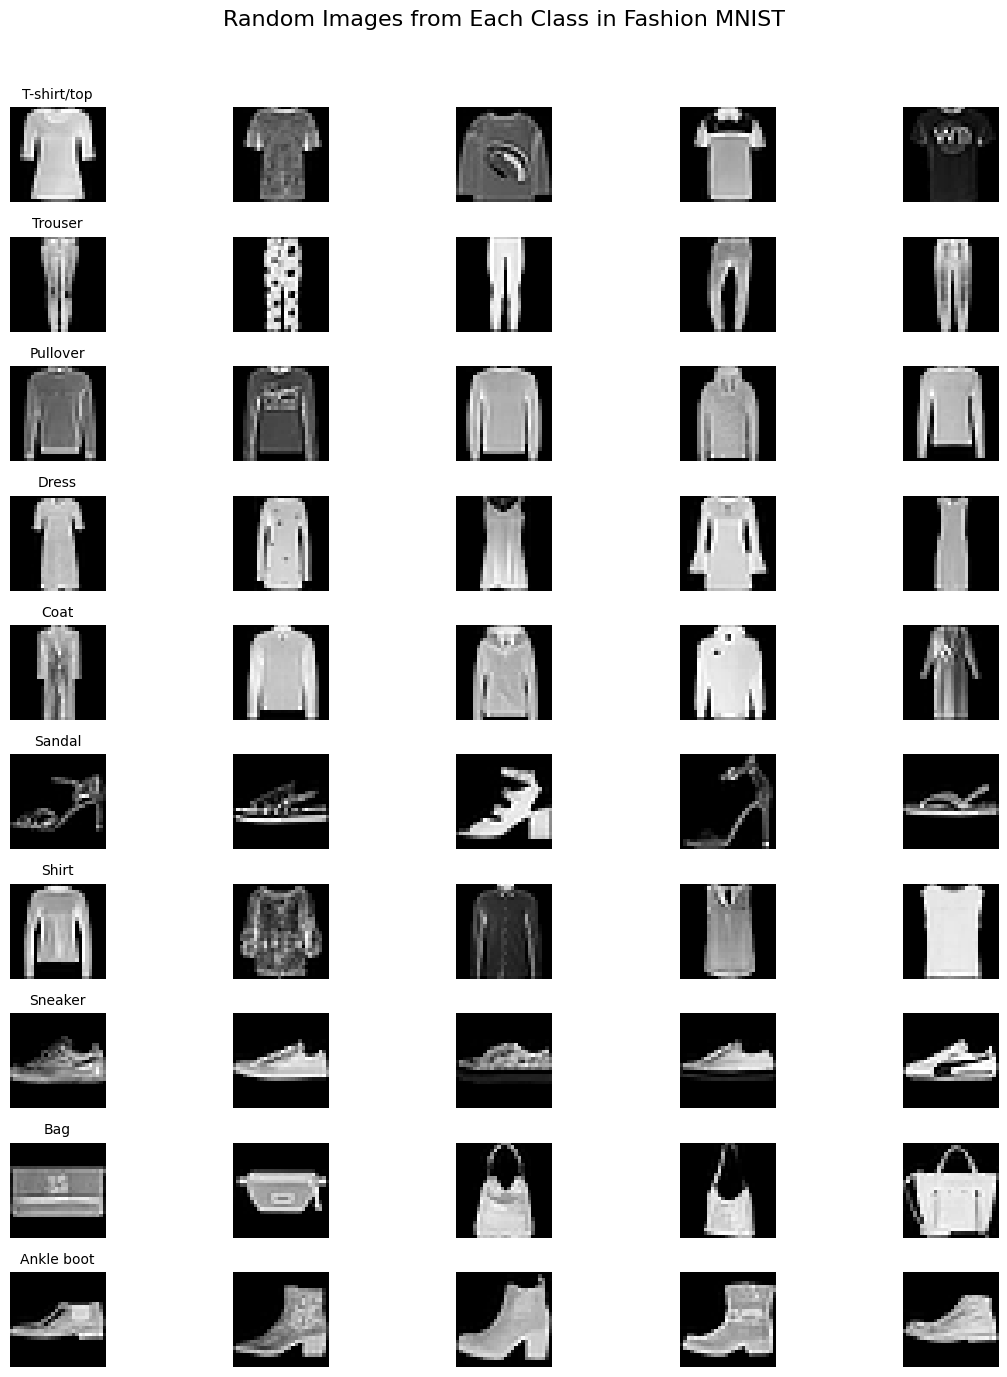

In [2]:
import matplotlib.pyplot as plt
import numpy as np

X, y = fashion_mnist.data, fashion_mnist.target.astype(int)

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Reshape images to 28x28 format
images = X.reshape(-1, 28, 28)

# Number of images to display per class
num_images_per_class = 5

# Create a plot grid
fig, axes = plt.subplots(len(class_labels), num_images_per_class, figsize=(12, 14))
fig.suptitle("Random Images from Each Class in Fashion MNIST", fontsize=16)

# Plot random images for each class
for class_index, label in enumerate(class_labels):
    # Get all indices of the current class
    class_indices = np.where(y == class_index)[0]
    # Randomly select a few images from the current class
    random_indices = np.random.choice(class_indices, num_images_per_class, replace=False)
    
    for i, ax in enumerate(axes[class_index]):
        ax.imshow(images[random_indices[i]], cmap="gray")
        ax.axis("off")
        if i == 0:
            ax.set_title(label, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Step 1: frequeny and bar plot

T-shirt/top: 7000
Trouser: 7000
Pullover: 7000
Dress: 7000
Coat: 7000
Sandal: 7000
Shirt: 7000
Sneaker: 7000
Bag: 7000
Ankle boot: 7000


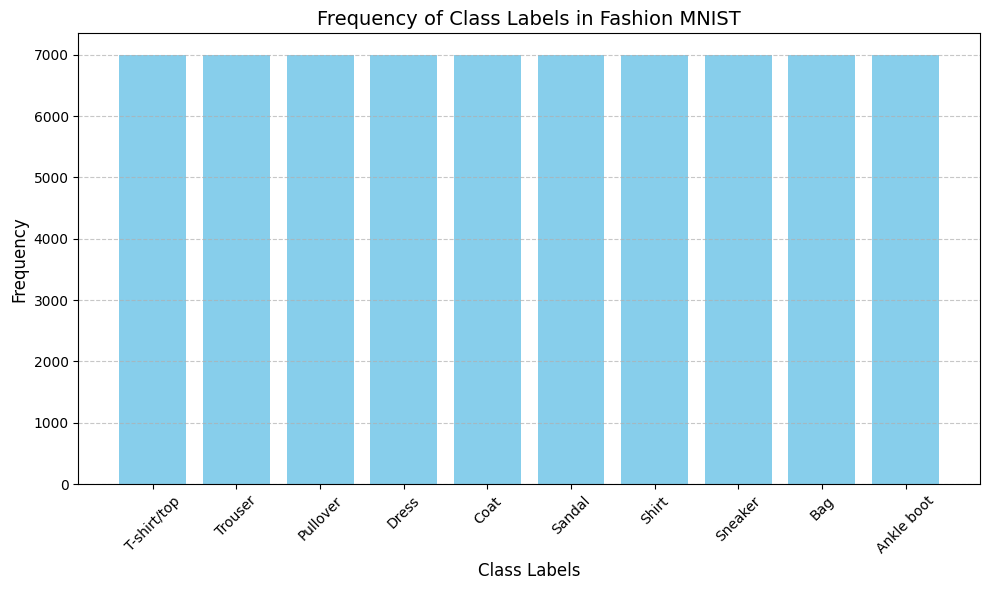

In [3]:

# Load the Fashion MNIST dataset
X, y = fashion_mnist.data, fashion_mnist.target.astype(int)

# Count the frequency of each label
class_counts = np.bincount(y, minlength=10)

# Class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display frequencies
for label, count in zip(class_labels, class_counts):
    print(f"{label}: {count}")

# Plot frequencies as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Class Labels in Fashion MNIST", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Step 1: using tsne to reduce dimensions and showing the scatter plot

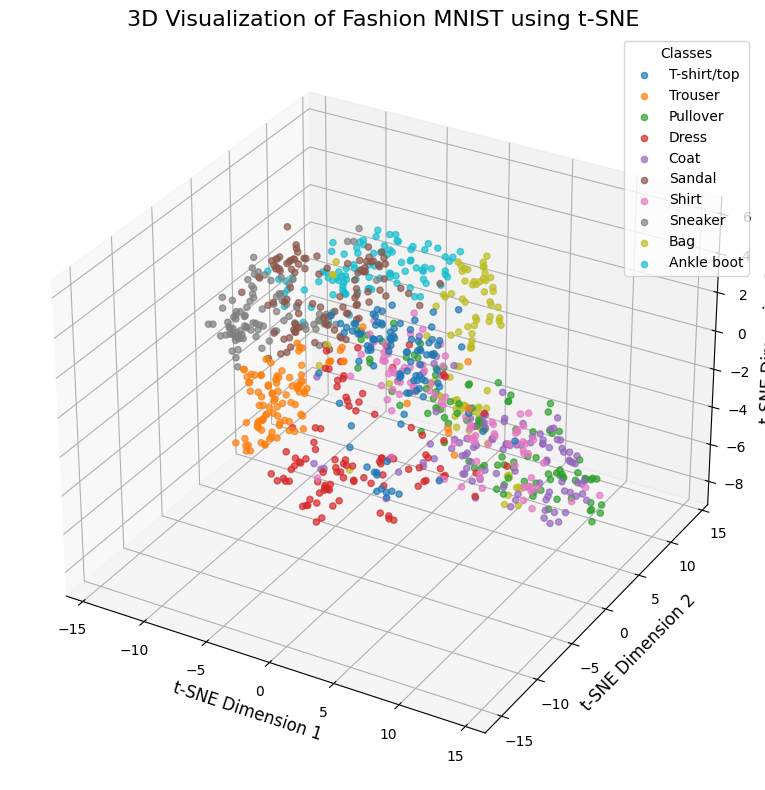

In [4]:
from sklearn.manifold import TSNE

# Randomly sample 100 data items from each class
num_samples_per_class = 100
sampled_indices = []

for class_label in np.unique(y):
    class_indices = np.where(y == class_label)[0]
    sampled_indices.extend(np.random.choice(class_indices, num_samples_per_class, replace=False))

X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# Use t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(X_sampled)

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
colors = plt.cm.tab10(np.arange(len(class_labels)))
for class_index, class_label in enumerate(class_labels):
    class_points = X_tsne_3d[y_sampled == class_index]
    ax.scatter(
        class_points[:, 0], class_points[:, 1], class_points[:, 2],
        label=class_label, s=20, alpha=0.7, color=colors[class_index]
    )

# Customize the plot
ax.set_title("3D Visualization of Fashion MNIST using t-SNE", fontsize=16)
ax.set_xlabel("t-SNE Dimension 1", fontsize=12)
ax.set_ylabel("t-SNE Dimension 2", fontsize=12)
ax.set_zlabel("t-SNE Dimension 3", fontsize=12)
ax.legend(loc='upper right', fontsize=10, title="Classes")
plt.tight_layout()
plt.show()


Step 2: data splitting

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets using a 70%-15%-15% ratio
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the shapes of the resulting splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (49000, 784), (49000,)
Validation set: (10500, 784), (10500,)
Test set: (10500, 784), (10500,)


Step 2:The preprocess part

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler , StandardScaler

def preprocess(train_features, val_features, test_features, variance_ratio,normalization_method='minmax'):
    print(f"Preprocessing with variance_ratio={variance_ratio}")
    # Ensuring inputs are NumPy arrays
    train_features = np.array(train_features)
    val_features = np.array(val_features)
    test_features = np.array(test_features)
    
    # Step (a): Normalize using Min-Max scaling
    if normalization_method == 'minmax':
        scaler = MinMaxScaler()
    elif normalization_method == 'zscore':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid normalization method. Choose 'minmax' or 'zscore'.")
    
    # Fit the scaler on the training set and transform all datasets
    train_features_scaled = scaler.fit_transform(train_features)
    val_features_scaled = scaler.transform(val_features)
    test_features_scaled = scaler.transform(test_features)

     # Print the number of dimensions before PCA
    print(f"Number of dimensions before PCA: {train_features_scaled.shape[1]}")
    
    # Step (b): Apply PCA to preserve the specified variance ratio
    pca = PCA(n_components=variance_ratio)
    
    # Fit PCA on the training set
    train_features_pca = pca.fit_transform(train_features_scaled)
    
    # Apply the same PCA transformation to the validation and test sets
    val_features_pca = pca.transform(val_features_scaled)
    test_features_pca = pca.transform(test_features_scaled)

    # Print the number of dimensions after PCA
    print(f"Number of dimensions after PCA: {train_features_pca.shape[1]}")
    
    # Return the preprocessed features
    return train_features_pca, val_features_pca, test_features_pca


Step 3 with k =3 and variant ratio of 0.90

In [7]:
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm  # For progress tracking


def process_point(eval_point, train_features, train_labels, k, distance_metric="euclidean", epsilon=1e-10):
    """
    Process a single evaluation point for KNN.
    
    Parameters:
        eval_point: The point to classify.
        train_features: Training feature data.
        train_labels: Training labels.
        k: Number of neighbors.
        distance_metric: Metric to compute distance ("euclidean" or "manhattan").
        epsilon: Small value to avoid division by zero.
    """
    # Calculate distances based on the selected metric
    if distance_metric == "euclidean":
        distances = np.sqrt(np.sum((train_features - eval_point) ** 2, axis=1))
    elif distance_metric == "manhattan":
        distances = np.sum(np.abs(train_features - eval_point), axis=1)
    else:
        raise ValueError("Unsupported distance metric. Use 'euclidean' or 'manhattan'.")

    # Identify the k nearest neighbors
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = train_labels[k_nearest_indices]
    k_nearest_distances = distances[k_nearest_indices]

    # Distance-weighted voting mechanism
    weights = 1 / (k_nearest_distances + epsilon)  # Adding small epsilon to avoid division by zero
    label_weights = Counter()
    for label, weight in zip(k_nearest_labels, weights):
        label_weights[label] += weight

    # Handle tie-breaking
    max_weight = max(label_weights.values())
    candidates = [label for label, weight in label_weights.items() if weight == max_weight]

    if len(candidates) > 1:
        avg_distances = {label: np.mean([distances[i] for i in k_nearest_indices if train_labels[i] == label])
                         for label in candidates}
        predicted_label = min(candidates, key=lambda label: avg_distances[label])
    else:
        predicted_label = candidates[0]

    return predicted_label

def knn_multithreaded(train_features, train_labels, evaluate_features, k, distance_metric="euclidean", epsilon=1e-10, num_threads=None):
    """
    K-Nearest Neighbors with multithreading.
    
    Parameters:
        train_features: Training feature data.
        train_labels: Training labels.
        evaluate_features: Evaluation feature data.
        k: Number of neighbors.
        distance_metric: Metric to compute distance ("euclidean" or "manhattan").
        epsilon: Small value to avoid division by zero.
        num_threads: Number of threads to use for multithreading.
    """
    # Use ThreadPoolExecutor to parallelize over evaluation points
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(tqdm(
            executor.map(
                process_point,
                evaluate_features,
                [train_features] * len(evaluate_features),
                [train_labels] * len(evaluate_features),
                [k] * len(evaluate_features),
                [distance_metric] * len(evaluate_features),
                [epsilon] * len(evaluate_features),
            ),
            total=len(evaluate_features),
            desc = f"Evaluating points with k={k}"
        ))
    return np.array(results)

# Example usage
k = 3
distance_metric = "euclidean"  # Can be "euclidean" Or "manhattan"

# Preprocessed data
train_features, val_features, test_features = preprocess(X_train, X_val, X_test, variance_ratio=0.90)
train_labels = y_train
val_labels = y_val

# Get predictions using multithreaded KNN with the chosen distance metric
predictions = knn_multithreaded(train_features, train_labels, val_features, k, distance_metric=distance_metric, num_threads=8)
accuracy = np.mean(predictions == val_labels)
print(f"Validation Accuracy using {distance_metric} distance: {accuracy:.4f}")
print(predictions)


Preprocessing with variance_ratio=0.9
Number of dimensions before PCA: 784
Number of dimensions after PCA: 84


Evaluating points with k=3: 100%|██████████| 10500/10500 [01:24<00:00, 124.37it/s]

Validation Accuracy using euclidean distance: 0.8605
[1 2 7 ... 5 6 8]


Bonus:Using manhattan with z-score as parameteres for k=3 and variance_ratio of 0.90

In [43]:
distance_metric = "manhattan"  # Can be "euclidean" Or "manhattan"
train_features1, val_features1, test_features1 = preprocess(X_train, X_val, X_test, variance_ratio=0.90,normalization_method='zscore')
predictions1 = knn_multithreaded(train_features, train_labels, val_features, k, distance_metric=distance_metric, num_threads=8)
accuracy_with_zscore = np.mean(predictions1 == val_labels)
print(f"Validation Accuracy using {distance_metric} distance: {accuracy_with_zscore:.4f}")
print(predictions1)


Preprocessing with variance_ratio=0.9
Number of dimensions before PCA: 784
Number of dimensions after PCA: 137


Evaluating points with k=3: 100%|██████████| 10500/10500 [01:44<00:00, 100.26it/s]

Validation Accuracy using manhattan distance: 0.8669
[1 2 7 ... 5 6 2]


Step 4: Using multi variables for k and var_ratio and finding the best accuracy

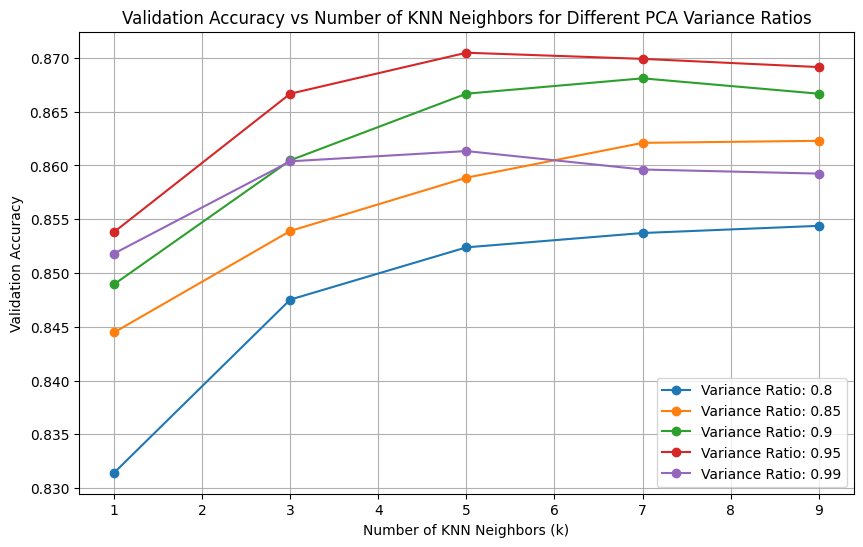

Best Validation Accuracy: 0.8705
Achieved with PCA Variance Ratio: 0.95 and KNN Neighbors (k): 5


In [ ]:
# Function to evaluate KNN with given hyperparameters
def evaluate_knn(train_features, train_labels, val_features, val_labels, k):
    predictions = knn_multithreaded(train_features, train_labels, val_features, k,num_threads=8)
    accuracy = np.mean(predictions == val_labels)
    return accuracy
# Hyperparameter ranges
k_values = [1, 3, 5, 7, 9]
variance_ratios = [0.8, 0.85, 0.9, 0.95, 0.99]

# Results storage
results = np.zeros((len(variance_ratios), len(k_values)))

# Experiment with each hyperparameter combination
for i, variance_ratio in enumerate(variance_ratios):
    # Preprocess with current variance ratio
    train_features, val_features, test_features = preprocess(X_train, X_val, X_test, variance_ratio=variance_ratio)
    
    for j, k in enumerate(k_values):
        # Evaluate KNN with current number of neighbors
        accuracy = evaluate_knn(train_features, y_train, val_features, y_val, k)
        results[i, j] = accuracy

# Visualization of results
plt.figure(figsize=(10, 6))
for i, variance_ratio in enumerate(variance_ratios):
    plt.plot(k_values, results[i], marker='o', label=f"Variance Ratio: {variance_ratio}")
    
plt.title("Validation Accuracy vs Number of KNN Neighbors for Different PCA Variance Ratios")
plt.xlabel("Number of KNN Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# Find the best result
best_index = np.unravel_index(np.argmax(results), results.shape)
best_variance_ratio = variance_ratios[best_index[0]]
best_k = k_values[best_index[1]]
best_accuracy = results[best_index]

# Print the best result
print(f"Best Validation Accuracy: {best_accuracy:.4f}")
print(f"Achieved with PCA Variance Ratio: {best_variance_ratio} and KNN Neighbors (k): {best_k}")


Step 4: Using Zscore and Manhattan distance as hyperparameters

Preprocessing with variance_ratio=0.8
Number of dimensions before PCA: 784
Number of dimensions after PCA: 50


Evaluating points with k=9: 100%|██████████| 10500/10500 [01:05<00:00, 159.79it/s]


Preprocessing with variance_ratio=0.85
Number of dimensions before PCA: 784
Number of dimensions after PCA: 81


Evaluating points with k=9: 100%|██████████| 10500/10500 [01:49<00:00, 95.66it/s] 


Preprocessing with variance_ratio=0.9
Number of dimensions before PCA: 784
Number of dimensions after PCA: 137


Evaluating points with k=9: 100%|██████████| 10500/10500 [02:50<00:00, 61.70it/s]


Preprocessing with variance_ratio=0.95
Number of dimensions before PCA: 784
Number of dimensions after PCA: 256


Evaluating points with k=9: 100%|██████████| 10500/10500 [05:37<00:00, 31.15it/s]


Preprocessing with variance_ratio=0.99
Number of dimensions before PCA: 784
Number of dimensions after PCA: 526


Evaluating points with k=9: 100%|██████████| 10500/10500 [13:03<00:00, 13.40it/s]


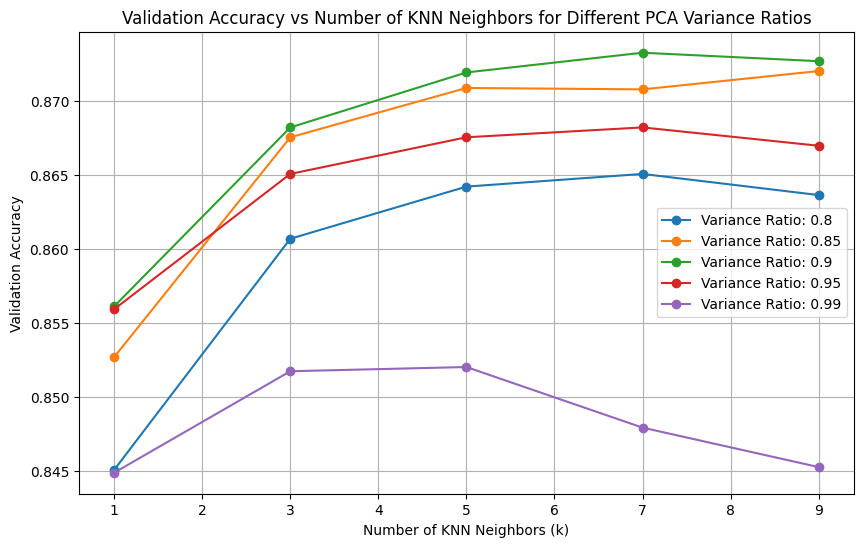

Best Validation Accuracy: 0.8732
Achieved with PCA Variance Ratio: 0.9 and KNN Neighbors (k): 7 and with euclidean distance metric which used z-score as normalization method


In [33]:
# Function to evaluate KNN with given hyperparameters
def evaluate_knn(train_features, train_labels, val_features, val_labels, k):
    predictions = knn_multithreaded(train_features, train_labels, val_features, k,num_threads=8,distance_metric='manhattan')
    accuracy = np.mean(predictions == val_labels)
    return accuracy
# Hyperparameter ranges
k_values = [1, 3, 5, 7, 9]
variance_ratios = [0.8, 0.85, 0.9, 0.95, 0.99]

# Results storage
results = np.zeros((len(variance_ratios), len(k_values)))

# Experiment with each hyperparameter combination
for i, variance_ratio in enumerate(variance_ratios):
    # Preprocess with current variance ratio
    train_features, val_features, test_features = preprocess(X_train, X_val, X_test, variance_ratio=variance_ratio,normalization_method='zscore')
    
    for j, k in enumerate(k_values):
        # Evaluate KNN with current number of neighbors
        accuracy = evaluate_knn(train_features, y_train, val_features, y_val, k)
        results[i, j] = accuracy

# Visualization of results
plt.figure(figsize=(10, 6))
for i, variance_ratio in enumerate(variance_ratios):
    plt.plot(k_values, results[i], marker='o', label=f"Variance Ratio: {variance_ratio}")
    
plt.title("Validation Accuracy vs Number of KNN Neighbors for Different PCA Variance Ratios")
plt.xlabel("Number of KNN Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# Find the best result
best_index = np.unravel_index(np.argmax(results), results.shape)
best_variance_ratio = variance_ratios[best_index[0]]
best_k = k_values[best_index[1]]
best_accuracy = results[best_index]

# Print the best result
print(f"Best Validation Accuracy: {best_accuracy:.4f}")
print(f"Achieved with PCA Variance Ratio: {best_variance_ratio} and KNN Neighbors (k): {best_k} and with {distance_metric} distance metric which used z-score as normalization method")


Step 5

Preprocessing with variance_ratio=0.95
Number of dimensions before PCA: 784
Number of dimensions after PCA: 188


Evaluating points with k=5: 100%|██████████| 10500/10500 [03:09<00:00, 55.40it/s]


Validation Accuracy for k=5 and Variance Ratio=0.95: 0.8705


Evaluating points with k=5: 100%|██████████| 10500/10500 [03:11<00:00, 54.80it/s]



Overall Metrics on the Test Set:
Accuracy: 0.8664


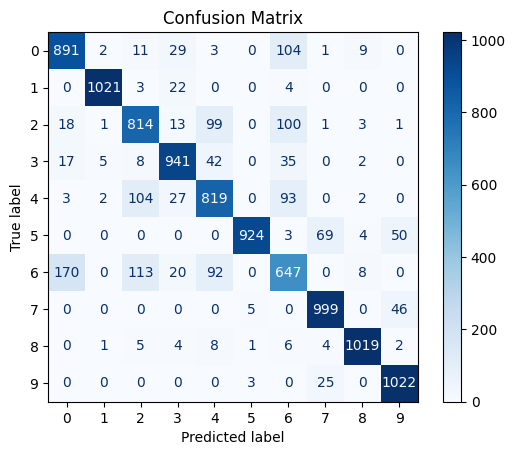

Class 0:
  Precision: 0.8107
  Recall: 0.8486
  F1 Score: 0.8292

Class 1:
  Precision: 0.9893
  Recall: 0.9724
  F1 Score: 0.9808

Class 2:
  Precision: 0.7694
  Recall: 0.7752
  F1 Score: 0.7723

Class 3:
  Precision: 0.8911
  Recall: 0.8962
  F1 Score: 0.8936

Class 4:
  Precision: 0.7705
  Recall: 0.7800
  F1 Score: 0.7752

Class 5:
  Precision: 0.9904
  Recall: 0.8800
  F1 Score: 0.9319

Class 6:
  Precision: 0.6522
  Recall: 0.6162
  F1 Score: 0.6337

Class 7:
  Precision: 0.9090
  Recall: 0.9514
  F1 Score: 0.9297

Class 8:
  Precision: 0.9733
  Recall: 0.9705
  F1 Score: 0.9719

Class 9:
  Precision: 0.9117
  Recall: 0.9733
  F1 Score: 0.9415

Macro Precision: 0.8668
Macro Recall: 0.8664
Macro F1 Score: 0.8660
Class 0 - AUC: 0.9133
Class 1 - AUC: 0.9856
Class 2 - AUC: 0.8747
Class 3 - AUC: 0.9420
Class 4 - AUC: 0.8771
Class 5 - AUC: 0.9395
Class 6 - AUC: 0.7898
Class 7 - AUC: 0.9704
Class 8 - AUC: 0.9838
Class 9 - AUC: 0.9814
Macro AUC: 0.9258


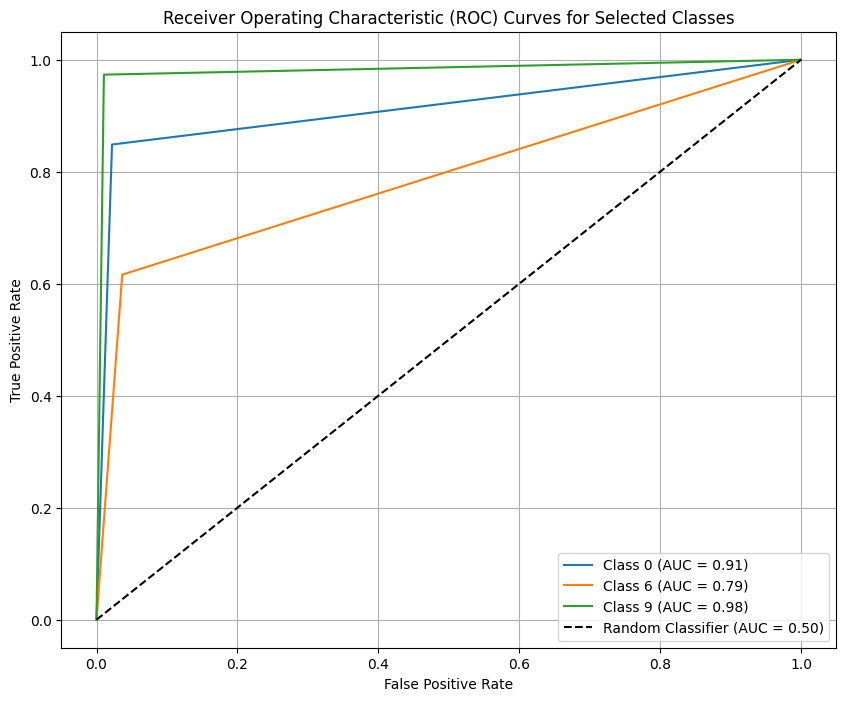

In [10]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate KNN with given hyperparameters
def evaluate_knn(train_features, train_labels, val_features, val_labels, k):
    predictions = knn_multithreaded(train_features, train_labels, val_features, k, num_threads=8, distance_metric='euclidean')
    accuracy = np.mean(predictions == val_labels)
    return accuracy

def plot_roc_curve(y_true, y_pred, classes):
    """
    Plot ROC curves for the specified classes.
    
    y_true: True labels for the test set.
    y_pred: Predicted labels for the test set.
    classes: List of classes to plot the ROC curve for.
    """
    # Convert string labels to numeric (if needed)
    label_map = {label: idx for idx, label in enumerate(np.unique(y_true))}
    y_true_numeric = np.array([label_map[label] for label in y_true])
    y_pred_numeric = np.array([label_map[label] for label in y_pred])

    # Binarize the labels for multi-class classification
    y_true_bin = label_binarize(y_true_numeric, classes=np.unique(y_true_numeric))
    n_classes = y_true_bin.shape[1]
    
    # Compute ROC curve and AUC for each class
    plt.figure(figsize=(10, 8))
    
    for i in classes:
        # Get the predicted probabilities for class `i`
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_numeric == i)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
    
    plt.title('Receiver Operating Characteristic (ROC) Curves for Selected Classes')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Set your desired hyperparameters
desired_k = 5  # For example, set k=5
desired_variance_ratio = 0.95  # Set your desired PCA variance ratio

# Preprocess with the desired variance ratio
train_features, val_features, test_features = preprocess(X_train, X_val, X_test, variance_ratio=desired_variance_ratio)

# Evaluate KNN with the desired number of neighbors (k)
accuracy = evaluate_knn(train_features, y_train, val_features, y_val, desired_k)
print(f"Validation Accuracy for k={desired_k} and Variance Ratio={desired_variance_ratio}: {accuracy:.4f}")

# Now, testing the model on the test set using the same hyperparameters
test_predictions = knn_multithreaded(train_features, y_train, test_features, desired_k, num_threads=8)

# Generate and report overall metrics
print("\nOverall Metrics on the Test Set:")

# Accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1 Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average=None)
for idx, label in enumerate(np.unique(y_test)):
    print(f"Class {label}:")
    print(f"  Precision: {precision[idx]:.4f}")
    print(f"  Recall: {recall[idx]:.4f}")
    print(f"  F1 Score: {f1[idx]:.4f}")
    print("")

# Macro Precision, Recall, F1 Score
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, test_predictions, average='macro')
print(f"Macro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

# AUC for each class (Macro Average)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
fpr, tpr, roc_auc = {}, {}, {}
for i in np.unique(y_test):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_predictions == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} - AUC: {roc_auc[i]:.4f}")

# Macro AUC (Average AUC across all classes)
fpr_macro, tpr_macro, _ = roc_curve(y_test_bin.ravel(), label_binarize(test_predictions, classes=np.unique(y_test)).ravel())
roc_auc_macro = auc(fpr_macro, tpr_macro)
print(f"Macro AUC: {roc_auc_macro:.4f}")

# ROC Curves for specific classes
plot_roc_curve(y_test, test_predictions, classes=[0, 6, 9])  # Class 0 (T-shirt/top), Class 6 (Shirt), Class 9 (Ankle boot)
